# 模型可视化

## 安装依赖

In [3]:
%pip install  grad-cam

Looking in indexes: https://mirrors.bfsu.edu.cn/pypi/web/simple
Note: you may need to restart the kernel to use updated packages.


In [4]:
from PIL import Image
def get_image_from_url(url):
    """A function that gets a URL of an image, 
    and returns a numpy image and a preprocessed
    torch tensor ready to pass to the model """
    import requests
    import cv2
    from pytorch_grad_cam.utils.image import preprocess_image
    import numpy as np

    
    img = np.array(Image.open(requests.get(url, stream=True).raw))
    img = cv2.resize(img, (512, 512))
    rgb_img_float = np.float32(img) / 255
    input_tensor = preprocess_image(rgb_img_float,
                                   mean=[0.485, 0.456, 0.406],
                                   std=[0.229, 0.224, 0.225])
    return img, rgb_img_float, input_tensor

In [29]:
url = r"https://gimg2.baidu.com/image_search/src=http%3A%2F%2Fwww.tuiyang.com%2Fdata%2Fattachment%2Fportal%2F202006%2F28%2F202006281580702939638909322012.jpg&refer=http%3A%2F%2Fwww.tuiyang.com&app=2002&size=f9999,10000&q=a80&n=0&g=0n&fmt=auto?sec=1664805463&t=e099db850fc636cfca4121acb13715e1"

cat_img, cat_img_float, cat_tensor = get_image_from_url(url)

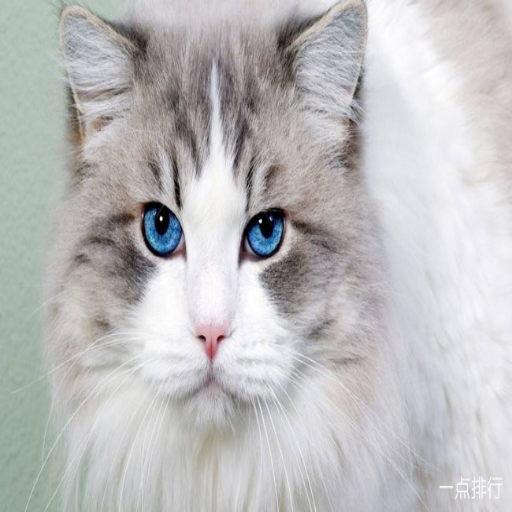

In [30]:
Image.fromarray(cat_img)

In [7]:
import torch
from torchvision import models

In [8]:
net = models.resnet34(pretrained=True)

/home/yuxi/code/resnet-pytorch/venv/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/yuxi/code/resnet-pytorch/venv/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [9]:
target_layers = [net.layer1[-1]]

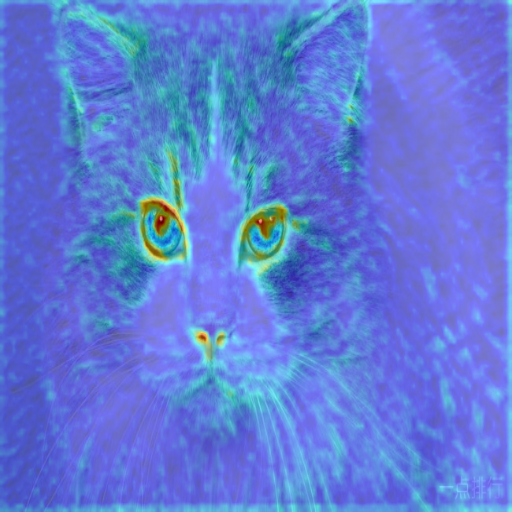

In [33]:
from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image, preprocess_image
from PIL import Image


data = cat_tensor.to(torch.float)
cat_concept_features = net(data)[0, :]
cat_targets = [ClassifierOutputTarget(282)]



with GradCAM(model=net,
             target_layers=target_layers,
             use_cuda=False) as cam:
    cat_grayscale_cam = cam(input_tensor=cat_tensor,
                        targets=cat_targets)[0, :]
visualization = show_cam_on_image(cat_img_float, cat_grayscale_cam, use_rgb=True)
Image.fromarray(visualization)


In [32]:
pred = net(cat_tensor)
pred.argmax()

tensor(283)